# TruthScan: Fake News Detection Project

TruthScan is an AI-driven system that uses natural language processing and machine learning to detect fake news. It preprocesses text data from news articles, applies TF-IDF vectorization, and compares Logistic Regression, Naive Bayes, and Random Forest classifiers to distinguish between genuine and fabricated content. The project aims to enhance media literacy and contribute to automated fact-checking efforts in the digital information landscape.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import re
import string
import streamlit

In [44]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

### About the Dataset:
1. title: the title of a news article
2. text: the text of the article; could be incomplete
3. subject: the subject(category) on which news article is written
4. date: the date on which the article was published
5. class: a label that marks whether the news article is real or fake:

           0: Fake news
           1: real News

In [45]:
fake_data = pd.read_csv('D:\\GTU Sem-5\\MLP\\Project\\Data\\Fake.csv')
true_data = pd.read_csv('D:\\GTU Sem-5\\MLP\\Project\\Data\\True.csv')

In [46]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [47]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [48]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [49]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [50]:
fake_data["class"] = 0
true_data["class"] = 1

In [51]:
fake_data.shape

(23481, 5)

In [52]:
true_data.shape

(21417, 5)

In [53]:
data = pd.concat([fake_data, true_data], axis=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [55]:
data['text_length'] = data['text'].apply(len)

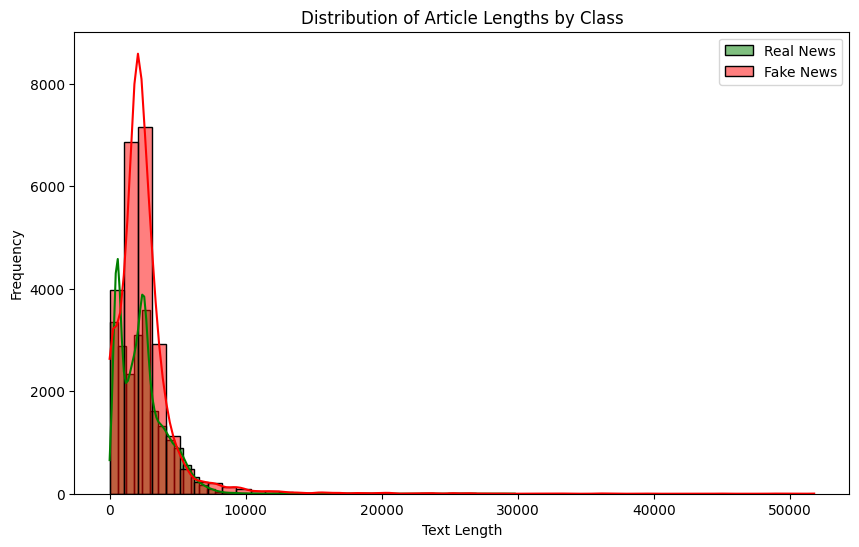

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['class'] == 1]['text_length'], bins=50, color='green', label='Real News', kde=True)
sns.histplot(data[data['class'] == 0]['text_length'], bins=50, color='red', label='Fake News', kde=True)
plt.legend()
plt.title('Distribution of Article Lengths by Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [57]:
df = data.drop(['title', 'subject', 'date'], axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         44898 non-null  object
 1   class        44898 non-null  int64 
 2   text_length  44898 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [59]:
df = df.sample(frac=1)

In [60]:
df.head()

,text,class,text_length
3733,In a convenient distraction from Trump s recen...,0,2797
12721,CAIRO (Reuters) - One of Egypt s top Muslim le...,1,447
16280,BRUSSELS (Reuters) - Spain remains an importan...,1,468
5986,"The cops should leave this woman, and all of h...",0,2167
5916,(Reuters) - A new ban on U.S. travel for natio...,1,1884


In [61]:
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [62]:
df.head()

,text,class,text_length
0,In a convenient distraction from Trump s recen...,0,2797
1,CAIRO (Reuters) - One of Egypt s top Muslim le...,1,447
2,BRUSSELS (Reuters) - Spain remains an importan...,1,468
3,"The cops should leave this woman, and all of h...",0,2167
4,(Reuters) - A new ban on U.S. travel for natio...,1,1884


In [63]:
lemmatizer = WordNetLemmatizer()

In [64]:
def clean_text(text):
    text = text.lower()  # Converts text to lowercase
    text = re.sub(r"\[.*?\]", "", text)  # Removes text within square brackets
    text = re.sub(r"\W", " ", text)  # Removes non-word characters
    text = re.sub(r"https?://\S+\s?", "", text)  # Removes URLs
    text = re.sub(r"<.*?>", "", text)  # Removes HTML tags
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # Removes punctuation
    text = re.sub(r"\n", " ", text)  # Removes newline characters
    text = re.sub(r"\w*\d\w*", "", text)  # Removes words containing numbers
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text


In [65]:
df['text'] = df['text'].apply(clean_text)

In [66]:
X = df['text']
y = df['class']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression()

In [70]:
predictionLR = LogisticRegressionModel.predict(X_test)

In [71]:
LogisticRegressionModel.score(X_test, y_test)

0.9866369710467706

In [72]:
print(classification_report(y_test, predictionLR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4656
           1       0.99      0.98      0.99      4324

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [73]:
from sklearn.naive_bayes import MultinomialNB

NaiveBayesModel = MultinomialNB()
NaiveBayesModel.fit(X_train, y_train)

MultinomialNB()

In [74]:
predictionNB = NaiveBayesModel.predict(X_test)

In [75]:
NaiveBayesModel.score(X_test, y_test)

0.9364142538975501

In [76]:
print(classification_report(y_test, predictionNB))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4656
           1       0.94      0.92      0.93      4324

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [77]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier(n_estimators=100, random_state=64)
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(random_state=64)

In [78]:
predictionRFC = RandomForestClassifierModel.predict(X_test)

In [79]:
RandomForestClassifierModel.score(X_test, y_test)

0.9917594654788419

In [80]:
print(classification_report(y_test, predictionRFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4656
           1       0.99      0.99      0.99      4324

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [81]:
def fake_or_not(n):
    if n==0:
        return "Fake"
    elif n==1:
        return "Not Fake"
    
def fake_news_prediction(news):
    news_article = {"text":[news]}
    news_df = pd.DataFrame(news_article)
    news_df["text"] = news_df["text"].apply(clean_text)
    new_X_test = news_df["text"]
    new_X_test = vectorization.transform(new_X_test)
    predictionLR = LogisticRegressionModel.predict(new_X_test)
    predictionNB = NaiveBayesModel.predict(new_X_test)  
    predictionRFC = RandomForestClassifierModel.predict(new_X_test)
    return print("\n\n Logistic Regression Prediction: {} \n Naive Bayes Prediction: {} \n Random Forest Classifier Prediction: {} ".format(predictionLR, predictionNB, predictionRFC))

In [82]:
#news = "The government has announced that all public schools will shut down permanently due to a new virus outbreak. According to an anonymous source, this decision is being taken to prevent further spread of the virus, which has mutated into a more deadly strain. The source also revealed that vaccines are ineffective against this new strain. Citizens are advised to stay indoors for the next six months."
news = "The Prime Minister announced new economic reforms aimed at boosting small businesses. During a press conference, the finance minister outlined policies that include tax reductions for startups and grants for women-led enterprises. The reforms will take effect starting next fiscal year and are expected to generate over 100,000 new jobs."
#news = "NASA has confirmed that the Earth will experience 15 days of complete darkness next month due to a rare planetary alignment. Scientists claim that Jupiter and Venus will align in such a way that their combined gravitational pull will block out the Sun's rays from reaching the Earth. Governments worldwide are urging citizens to stock up on food and supplies for this unprecedented event."
fake_news_prediction(news)



 Logistic Regression Prediction: [0] 
 Naive Bayes Prediction: [0] 
 Random Forest Classifier Prediction: [0] 


Todo:
1. Project definition
2. Dataset details
3. EDA model's concept
4. Theory
5. Plots
6. Accuracy